In [ ]:
# Stocks Symbol List Data Source: https://datahub.io/core/nyse-other-listings#python
# Stock Data Source: FinnHub

In [1]:
# packages
# data
import finnhub
from datapackage import Package

# scientific
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# utils
import time
import requests
import json


In [ ]:
################################################################################################

In [53]:
# Gathering data from https://datahub.io/core/nyse-other-listings#python 
# -- on 01.12.2021 8497 symbols were captured
stocks = []
package = Package('https://datahub.io/core/nyse-other-listings/datapackage.json')

# print list of all resources:
# print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        for entry in resource.read():
            stocks.append(entry[0])

In [78]:
# EXTRA SYMBOLS
weed_stocks = ["GRWG", "JUSHF", "CRLBF", "HRVSF", "MJ", "CURLF", "CGC"]

tech_stocks = ["SNE", "XRX", "CSCO", "SIRI", "ROKU", "ATVI", "EA", "VZ", "T", "TMUS", "AMAT",
              "TXN", "MU", "FB", "MSFT", "SNAP", "AMZN", "TWTR", "AMD", "QCOM", "AVGO", "AAPL",
              "INTC", "NVDA", "NFLX"]

fin_stocks = ["AXP", "V", "MA", "JPM", "DFS", "MS", "BAC", "GS", "SQ", "PYPL", "GDOT"]

oil_chem_stocks = ["NGG", "PCG", "RDS-B", "OXY", "MRO", "DD", "CVX", "DOW", "XOM", "PSX", "COP", 
              "HAL"]

travel_stocks = ["LUV", "MAR", "ABNB", "CCL", "RCL", "DIS", "AAL", "JBLU", "SAVE", "DAL"]

food_consumer_stocks = ["DRI", "GIS", "NKE", "PG", "SHAK", "GRUB", "KDP", "PEP", "KO", "K", "QSR", "CMG",
              "YUM", "BGS", "ACI", "DAR", "KR", "GE", "GOOS", "HD", "LULU", "DPZ", "SBUX", "MMM",
              "WMT", "TGT", "COST", "JACK", "MCD"]

pharma_stocks = ["CVS", "RAD", "UNH", "LLY", "JNJ", "BMY", "AZN", "MRK", "ABBV", "GILD", "PFE"]

defense_infra_stocks = ["GD", "LMT", "NOC", "BA", "CAT", "WM"]

auto_stocks = ["HMC", "TM", "F", "TSLA", "GM"]

all_stocks = (weed_stocks + tech_stocks + fin_stocks + oil_chem_stocks 
                + travel_stocks + food_consumer_stocks + pharma_stocks 
                + defense_infra_stocks + auto_stocks)

for symb in all_stocks:
    if str(symb) not in stocks:
        stocks.append(str(symb))

In [66]:
# scrubbing data of symbols which contain bad_chars = ["$", ";", ":", "!", "*", "."]
bad_chars = ["$", ";", ":", "!", "*", "."]

for s in stocks:
    for char in bad_chars:
        if char in str(s):
            print(s)
            stocks.remove(str(s))

In [79]:
print(len(stocks))

7477


In [54]:
################################################################################################

8497


In [3]:
df = {}

In [25]:
count = 1

# Stock data
for stock in stocks:
    try:
        # request company's beta
        r = requests.get('https://finnhub.io/api/v1/stock/metric?symbol=' + str(stock) + '&metric=all&token=bvt5fmf48v6rku8bvmn0')
        metrics = r.json()["metric"]
        count += 1
        
        beta = metrics["beta"]
        vol = metrics["10DayAverageTradingVolume"]
        if beta == None or vol == None or (str(stock) in df.keys()):
            continue
        
        # fill dictionary
        if beta > 1.8 and vol <= 100:
            df[str(stock)] = {"beta": beta, "volume_10_day": vol}
            
        if count == 501:
            break
        
    except:
        print(str(count) + '...' + str(stock))
        time.sleep(5)
        pass

Exception.. AMBR
Exception.. AMFW
Exception.. AMH$A
Exception.. AMH$B
Exception.. AMH$C
Exception.. AMID
Exception.. AMRE
Exception.. AMT$A
Exception.. AMTG
Exception.. AMTG$A
Exception.. ANET
Exception.. ANF
Exception.. ANFI
Exception.. ANH
Exception.. ANH$A
Exception.. ANH$B
Exception.. ANN
Exception.. ANR
Exception.. ANTM
Exception.. ANW
Exception.. AOD
Exception.. AOI
Exception.. AOL
Exception.. AON
Exception.. AOS
Exception.. AP
Exception.. APA
Exception.. APAM
Exception.. APB
Exception.. APC
Exception.. APD
Exception.. APF
Exception.. APH
Exception.. APL
Exception.. APL$E
Exception.. APO
Exception.. APU
Exception.. AR
Exception.. ARC
Exception.. ARCO
Exception.. ARCX
Exception.. ARDC
Exception.. ARE
Exception.. ARE$E
Exception.. ARES
Exception.. ARG
Exception.. ARH$C
Exception.. ARI
Exception.. ARI$A
Exception.. ARL
Exception.. ARMF
Exception.. ARMK
Exception.. ARN
Exception.. ARO
Exception.. ARP
Exception.. ARP$D
Exception.. ARPI
Exception.. ARR
Exception.. ARR$A
Exception.. ARR

Exception.. DLR$F
Exception.. DLR$G
Exception.. DLR$H
Exception.. DLX
Exception.. DM
Exception.. DMB
Exception.. DMD
Exception.. DMO
Exception.. DNB
Exception.. DNI
Exception.. DNOW
Exception.. DNP
Exception.. DNR
Exception.. DNY
Exception.. DO
Exception.. DOC
Exception.. DOM
Exception.. DOOR
Exception.. DOV
Exception.. DOW
Exception.. DPG
Exception.. DPLO
Exception.. DPM
Exception.. DPS
Exception.. DPZ
Exception.. DQ
Exception.. DRA
Exception.. DRC
Exception.. DRD
Exception.. DRE
Exception.. DRH
Exception.. DRII
Exception.. DRL
Exception.. DST
Exception.. DSW
Exception.. DSX$B
Exception.. DTK
Exception.. DTLA$
Exception.. DTQ
Exception.. DTT
Exception.. DTZ
Exception.. DUA
Exception.. DUKH
Exception.. DV
Exception.. DW
Exception.. DWRE
Exception.. DX$A
Exception.. DX$B
Exception.. DXB
Exception.. DYN$A
Exception.. DYN.W


KeyboardInterrupt: 

In [30]:
n = len(df)
display(n)
display(list(df.values()))

52

[{'beta': 2.57318, 'volume_10_day': 3.90649},
 {'beta': 1.61963, 'volume_10_day': 0.15553},
 {'beta': 1.85855, 'volume_10_day': 0.90241},
 {'beta': 2.27558, 'volume_10_day': 0.45883},
 {'beta': 1.72907, 'volume_10_day': 0.07045},
 {'beta': 1.60861, 'volume_10_day': 1.10303},
 {'beta': 2.33199, 'volume_10_day': 0.88619},
 {'beta': 2.45996, 'volume_10_day': 6.69576},
 {'beta': 1.88281, 'volume_10_day': 1.3609},
 {'beta': 2.06317, 'volume_10_day': 1.21967},
 {'beta': 5.01592, 'volume_10_day': 8.33155},
 {'beta': 1.87467, 'volume_10_day': 0.35814},
 {'beta': 1.60385, 'volume_10_day': 0.9484},
 {'beta': 4.85665, 'volume_10_day': 8.04063},
 {'beta': 1.60786, 'volume_10_day': 0.22658},
 {'beta': 1.58175, 'volume_10_day': 0.6287},
 {'beta': 1.93386, 'volume_10_day': 1.67109},
 {'beta': 1.56082, 'volume_10_day': 0.30003},
 {'beta': 2.53517, 'volume_10_day': 28.74325},
 {'beta': 1.70516, 'volume_10_day': 0.48553},
 {'beta': 1.88723, 'volume_10_day': 1.43241},
 {'beta': 1.7536, 'volume_10_day': 0

In [35]:
beta = {}
vol = {}
for s, m in zip(list(df.keys()), list(df.values())):
    beta[str(s)] = m["beta"]
    vol[str(s)] = m["volume_10_day"]
    
display(beta)
display(vol)

{'AA': 2.57318,
 'ABG': 1.61963,
 'ABR': 1.85855,
 'ACCO': 2.27558,
 'ACH': 1.72907,
 'ACM': 1.60861,
 'AER': 2.33199,
 'AHT': 2.45996,
 'ANF': 1.88281,
 'ANH': 2.06317,
 'APA': 5.01592,
 'APAM': 1.87467,
 'APO': 1.60385,
 'AR': 4.85665,
 'ARC': 1.60786,
 'ARCO': 1.58175,
 'ARMK': 1.93386,
 'ARW': 1.56082,
 'AMC': 2.53517,
 'AMP': 1.70516,
 'ATI': 1.88723,
 'ATTO': 1.7536,
 'AWH': 3.27295,
 'AXL': 2.59927,
 'BH': 2.53644,
 'BIG': 2.48662,
 'BKD': 1.86313,
 'CAE': 2.04848,
 'CAPL': 2.15904,
 'CBL': 2.5525,
 'CCL': 2.29749,
 'CCO': 2.69703,
 'CCS': 1.89889,
 'CDE': 1.9626,
 'CMRE': 1.72862,
 'CNK': 2.65576,
 'CNQ': 2.28437,
 'CNX': 1.74283,
 'CODI': 1.77743,
 'COF': 1.71507,
 'COP': 1.83489,
 'COTY': 2.30569,
 'CPE': 3.4246,
 'CPG': 3.43961,
 'CXO': 2.07195,
 'CYH': 2.05781,
 'DAC': 1.7152,
 'DAN': 2.61706,
 'DBD': 3.51391,
 'DDD': 1.98859,
 'DSE': 2.76125,
 'DVN': 3.51713}

{'AA': 3.90649,
 'ABG': 0.15553,
 'ABR': 0.90241,
 'ACCO': 0.45883,
 'ACH': 0.07045,
 'ACM': 1.10303,
 'AER': 0.88619,
 'AHT': 6.69576,
 'ANF': 1.3609,
 'ANH': 1.21967,
 'APA': 8.33155,
 'APAM': 0.35814,
 'APO': 0.9484,
 'AR': 8.04063,
 'ARC': 0.22658,
 'ARCO': 0.6287,
 'ARMK': 1.67109,
 'ARW': 0.30003,
 'AMC': 28.74325,
 'AMP': 0.48553,
 'ATI': 1.43241,
 'ATTO': 0.01645,
 'AWH': 0.59731,
 'AXL': 1.90788,
 'BH': 0.00615,
 'BIG': 1.36951,
 'BKD': 1.46658,
 'CAE': 0.61408,
 'CAPL': 0.05044,
 'CBL': 4.76413,
 'CCL': 30.40539,
 'CCO': 1.47708,
 'CCS': 0.32102,
 'CDE': 4.1866,
 'CMRE': 0.50415,
 'CNK': 5.27452,
 'CNQ': 5.67977,
 'CNX': 3.66725,
 'CODI': 0.16987,
 'COF': 2.24326,
 'COP': 7.84057,
 'COTY': 10.22495,
 'CPE': 3.10957,
 'CPG': 4.13536,
 'CXO': 1.33698,
 'CYH': 1.33859,
 'DAC': 0.58342,
 'DAN': 1.40884,
 'DBD': 0.61099,
 'DDD': 24.03459,
 'DSE': 0.02815,
 'DVN': 17.69567}

In [ ]:
# plot for beta
fig, ax = plt.subplots()
ax.bar(list(df.keys()), beta, color='g')

ax.set_xticks(range(len(df)))
ax.set_xticklabels(list(df.keys()))
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()

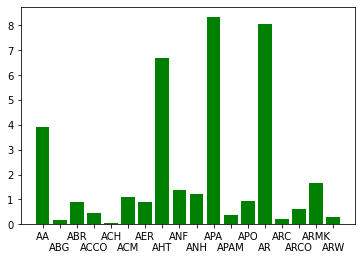

In [22]:
# plot for volume  
fig, ax = plt.subplots()
ax.bar(list(df.keys()), vol, color='g')

ax.set_xticks(range(len(df)))
ax.set_xticklabels(list(df.keys()))
# [1::2] means start from the second element in the list and get every other element
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
plt.show()